In [1]:

import os
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dython.nominal import associations  # correlation calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from tabulate import tabulate
from lazypredict.Supervised import LazyClassifier,LazyRegressor
from sklearn.datasets import load_breast_cancer
import lazypredict
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors._classification import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pdpbox import pdp, get_dataset, info_plots
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'category_feature' is the categorical column you want to encode
data = pd.read_csv("insurance.csv")  # Load your dataset

df_dummies = pd.get_dummies(data['region'], prefix='region', drop_first=True).astype(int)
df = pd.concat([data.drop('region', axis=1), df_dummies], axis=1)

# Mapping 'smoker' and 'sex' columns to numeric values
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# Separating features and target variable
features = df.drop('charges', axis=1)
targets = df['charges']
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=123)

# Adding constant for the OLS model
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
lr = LinearRegression()
lr.fit(x_train,y_train)
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])
categorical_cols = ["region"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["age","sex","bmi","children","smoker",]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
linear_regression_model = make_pipeline(
    preprocessor,
    StandardScaler(),
    LinearRegression()
)
# Displaying model summary
display(model.summary())
df = None
df = data
# Mapping 'smoker' and 'sex' columns to numeric values
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'female': 1, 'male': 0})
features2 = df.drop('charges', axis=1)
targets2 = df['charges']
x_train, x_test, y_train, y_test = train_test_split(features2, targets2, test_size=0.3, random_state=123)

linear_regression_model.fit(x_train,y_train)
random_forest_model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)
linear_regression_model.fit(x_train,y_train)

# # Save model summary as LaTeX
with open("summary_table.tex", "w") as f:
    f.write(model.summary().tables[1].as_latex_tabular())
# Accessing coefficients of the Logistic Regression model in the pipeline
if isinstance(linear_regression_model.named_steps['linearregression'], LinearRegression):
    # Retrieving coefficients if the final estimator is Logistic Regression
    model = linear_regression_model.named_steps['linearregression']
    print("Model Coefficients:", model.coef_)
else:
    print("The final estimator is not Logistic Regression.")

models_to_include = [
    'svc', 'random_forest', 'kneighbors', 'gradient_boosting'
]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error'))])
categorical_cols = ["region"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["age","sex","bmi","children","smoker",]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
# data = load_breast_cancer()
# X = data.data
# y= data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
# clf = LazyRegressor(verbose=0,
#                      ignore_warnings=True,
#                      custom_metric=None,
#                      predictions=True,
#                      regressors=[RandomForestRegressor, LinearRegression,DecisionTreeRegressor,SVR,xgb.XGBRegressor])
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# models


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          5.65e-302
Time:                        18:57:30   Log-Likelihood:                -10856.
No. Observations:                1070   AIC:                         2.173e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.191e+04   1160.433    -10.267      0.000   -1.42e+04   -9636.900
age                255.6473     13.521     18.907      0.000     229.116     282.178
sex                 83.4417    380.922      0.219      0.827    -664.004     830.887
bmi                342.6760     33.120     10.347      0.000     277.688     407.664
children           451.5873    155.605      2.902      0.004     146.259     756.916
smoker             2.35e+04    476.363     49.334      0.000    2.26e+04    2.44e+04
region_northwest  -419.2201    541.357     -0.774      0.439   -1481.473     643.032
region_southeast -1033.2737    546.422     -1.891      0.059   -2105.463      38.916
region_southwest -1026.3479    554.371     -1.851      0.064   -2114.135      61.439
==============================================================================
Omnibus:                      260.172   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.154
Skew:                           1.303   Prob(JB):                    5.88e-135
Kurtosis:                       5.660   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Coefficients: [3628.5073809    46.71372098 2057.97740744  582.93600694 9447.36225393
 -244.37028142 -476.92310637 -475.96246344]


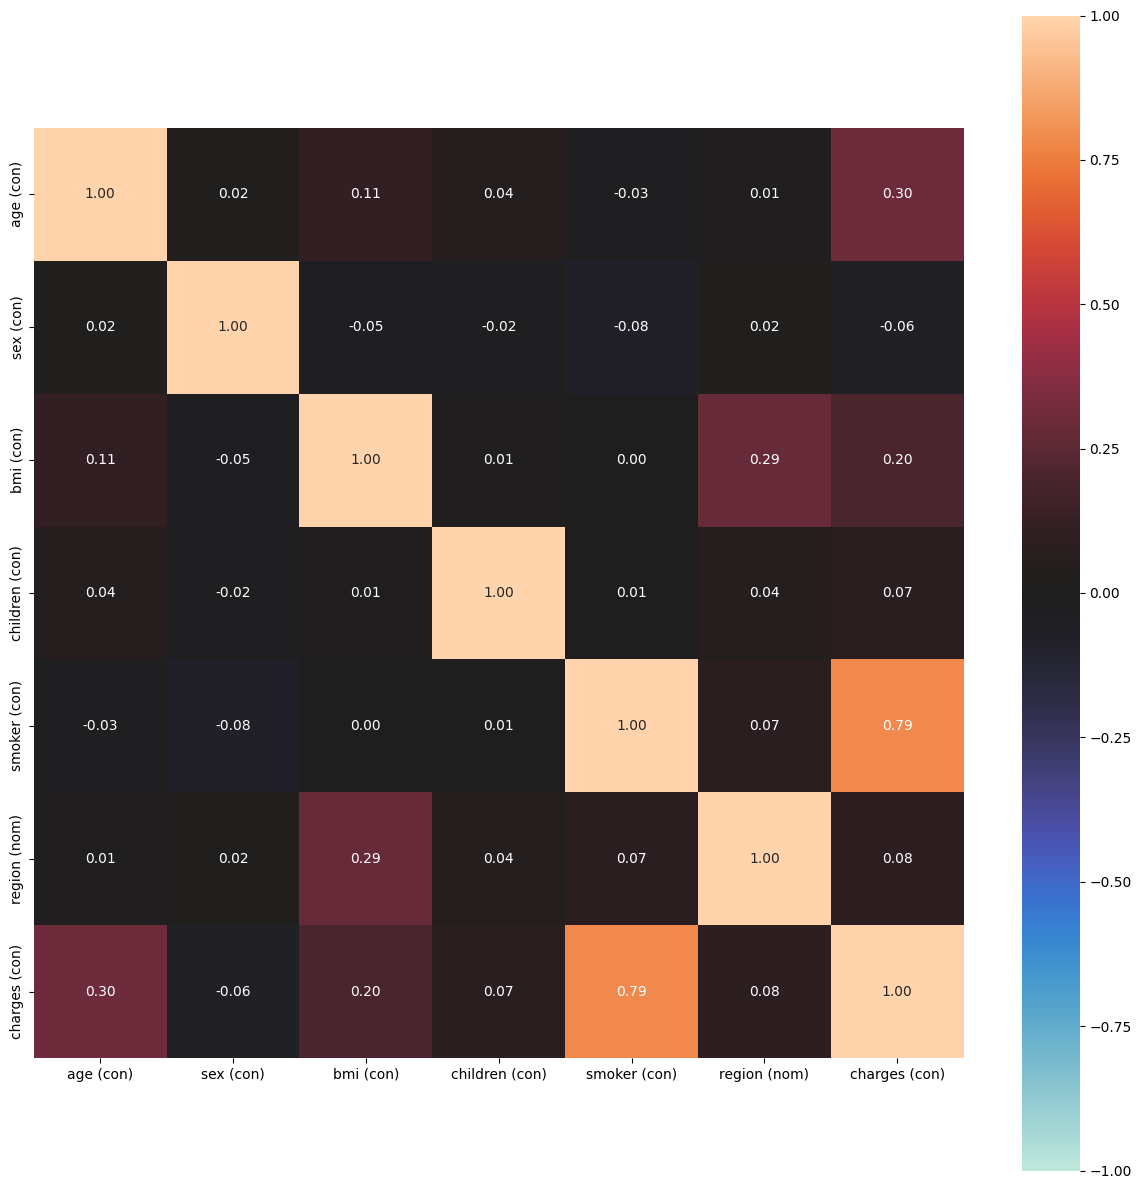

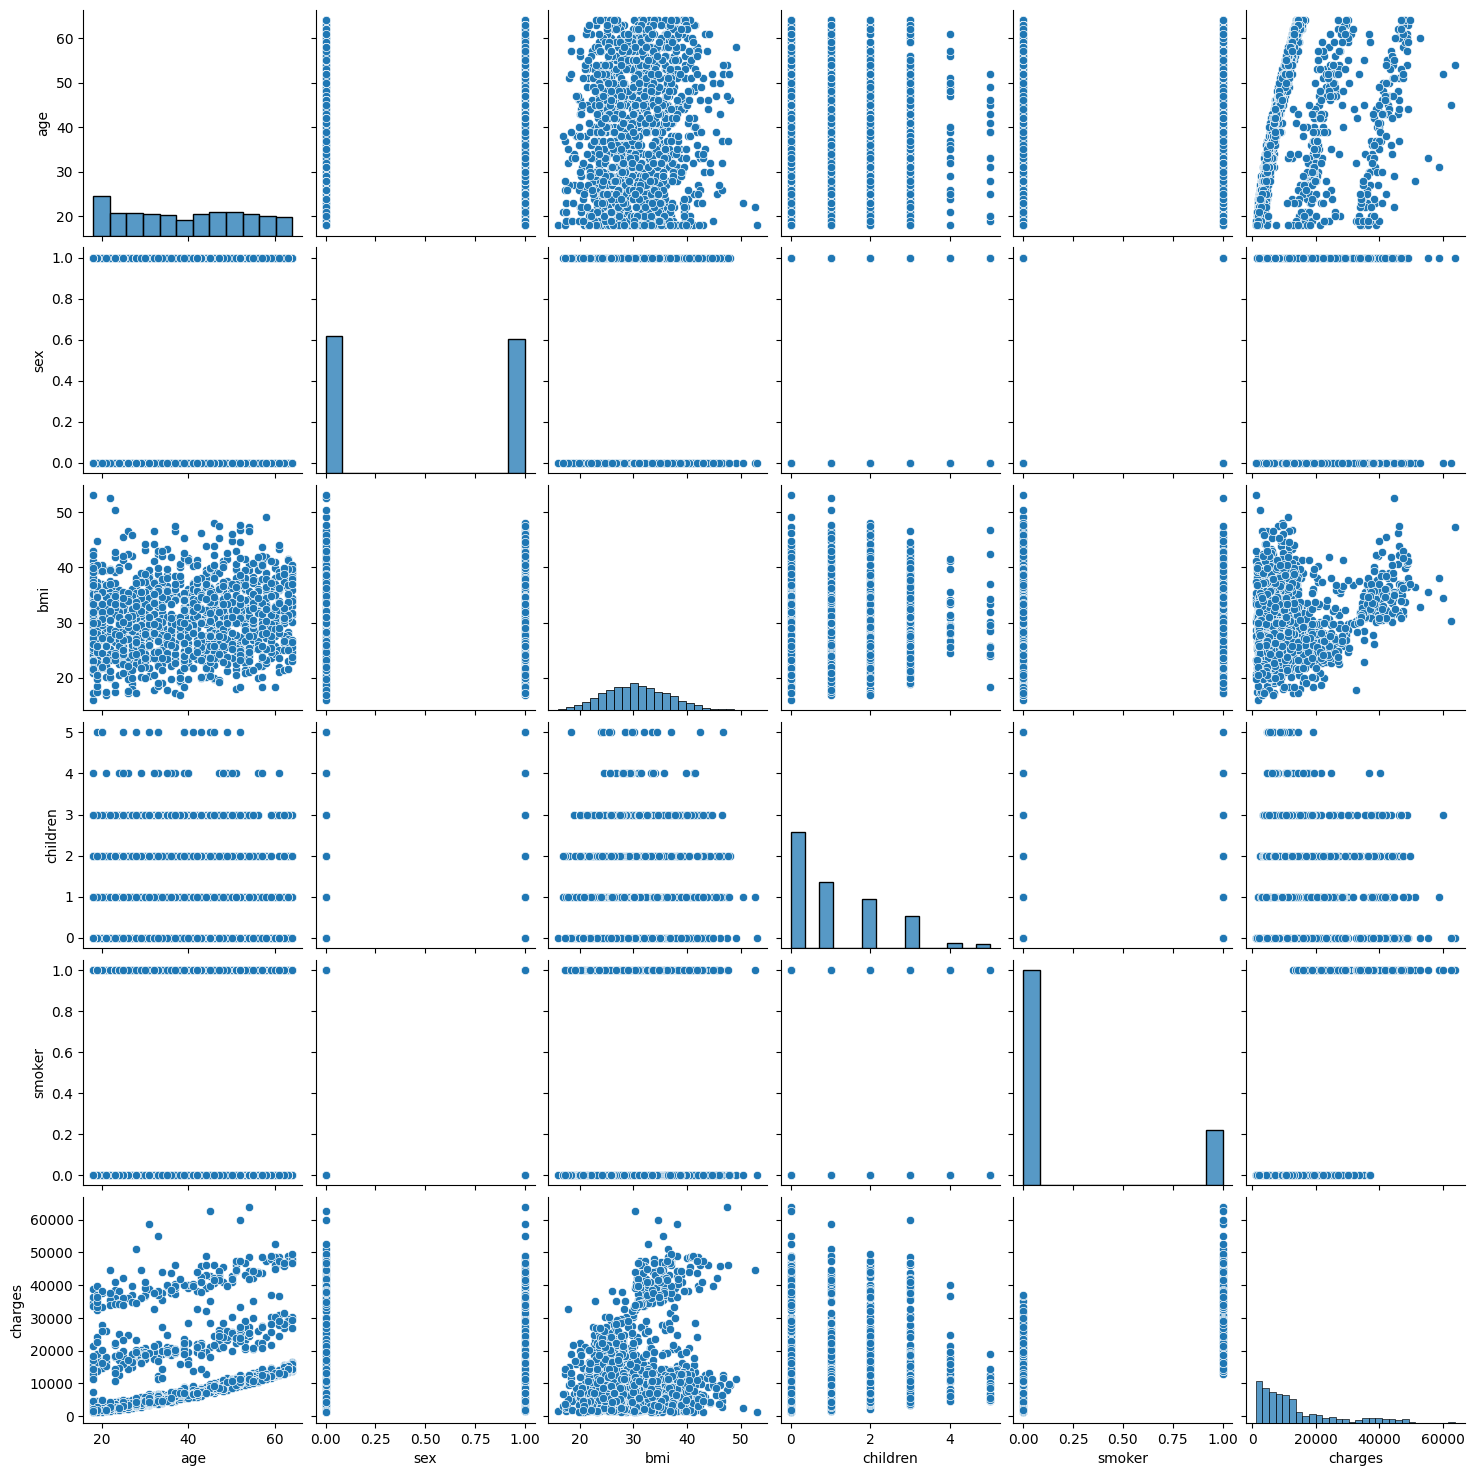

In [2]:
correlation_matrix = associations(
    data, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True)
sns.pairplot(data)

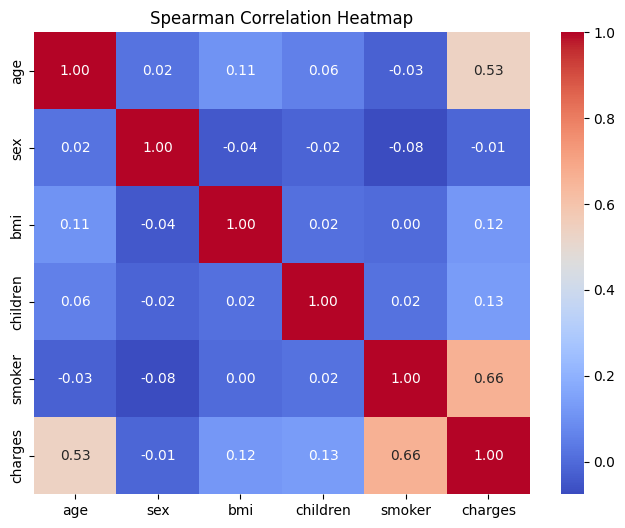

In [2]:
from scipy.stats import spearmanr
# Calculating Spearman correlation
corr = data.corr(method='spearman')

# Creating a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

assumptions : features with high coef should show liear correlatiuon with target 
assumptions : features with low coef are probably have not much effect on target and should show vertical line


0.7627582187528817
0.8315300102705727
MSE rf: 23875006.431069043
RMSE rf: 4886.205729507205
0.8126618590974233
MSE xgb: 26548938.03945115
RMSE xgb: 5152.566160608823
0.7815072831183696
MSE dnn: 30964060.893389393
RMSE dnn: 5564.535999828682


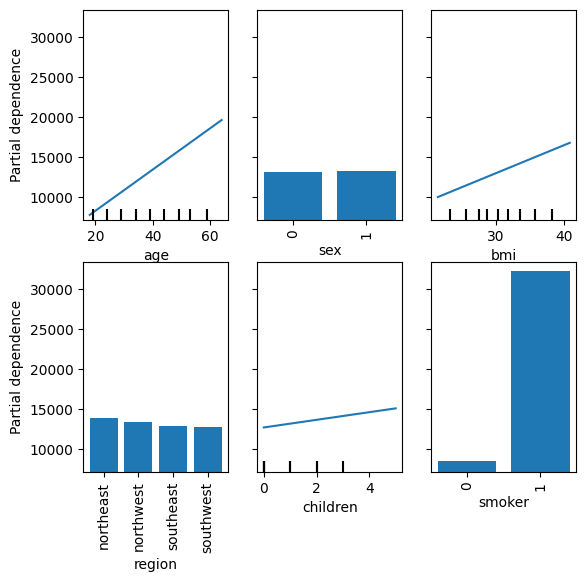

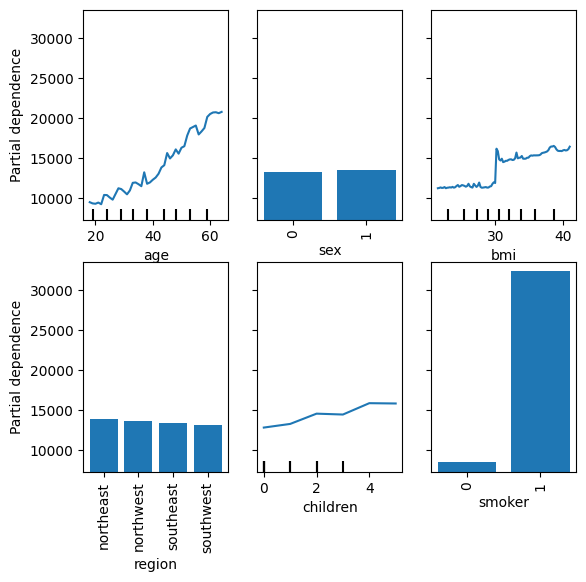

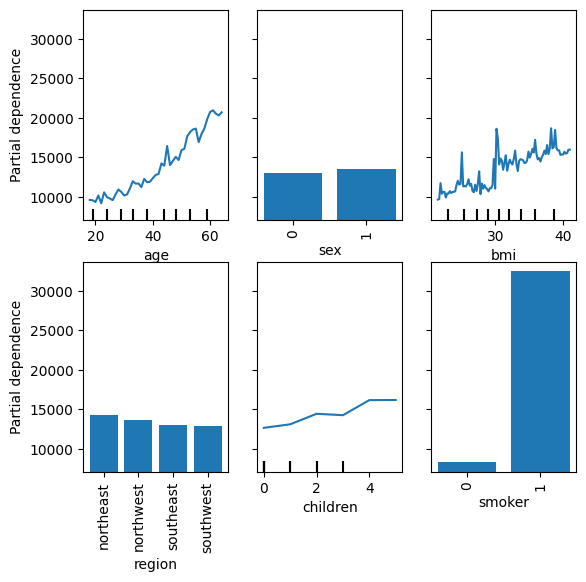

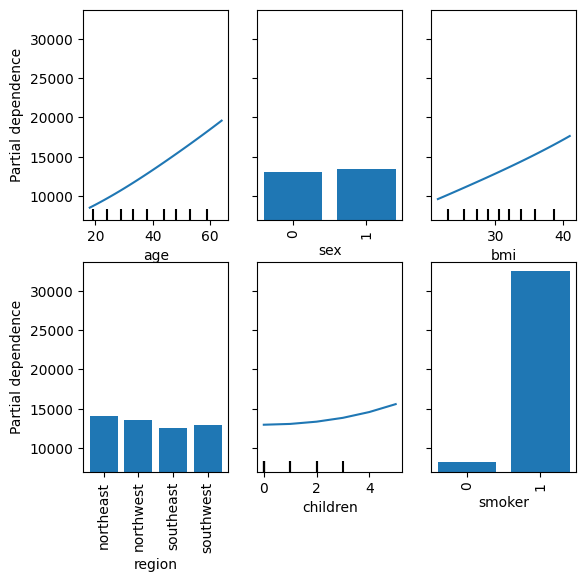

In [3]:

from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor
feature_names = [2,4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
linear_regression_model = make_pipeline(
    preprocessor,
    LinearRegression()
)
linear_regression_model.fit(x_train,y_train)
pred = linear_regression_model.predict(x_test)
print(r2_score(y_test,pred))
disp1 =PartialDependenceDisplay.from_estimator(linear_regression_model, x_train, features=["age","sex","bmi","region","children","smoker"],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])
x_train, x_test, y_train, y_test = train_test_split(features2, targets2, test_size=0.3, random_state=1)

random_forest_model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)
random_forest_model.fit(x_train,y_train)
pred = random_forest_model.predict(x_test)
print(r2_score(y_test,pred))
print('MSE rf:', metrics.mean_squared_error(y_test, pred))
print('RMSE rf:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(random_forest_model, x_train, features=["age","sex","bmi","region","children","smoker"],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])
xgb_model = make_pipeline(
    preprocessor,
    xgb.XGBRegressor()
)
xgb_model.fit(x_train,y_train)
pred = xgb_model.predict(x_test)
print(r2_score(y_test,pred))
print('MSE xgb:', metrics.mean_squared_error(y_test, pred))
print('RMSE xgb:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(xgb_model, x_train, features=["age","sex","bmi","region","children","smoker"],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])
# svr_model = make_pipeline(
#     preprocessor,
#     StandardScaler(),
#     SVR()
# )
# svr_model.fit(x_train,y_train)
# pred = svr_model.predict(x_test)
# print(r2_score(y_test,pred))

# plt.figure(figsize=(14, 6))
# ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
# PartialDependenceDisplay.from_estimator(svr_model, x_train, features=["age","sex","bmi","region","children","smoker"],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])
dnn_model = make_pipeline(
    preprocessor,
    StandardScaler(),
    MLPRegressor(max_iter=5000,hidden_layer_sizes=100)
)
dnn_model.fit(x_train,y_train)
pred = dnn_model.predict(x_test)
print(r2_score(y_test,pred))
print('MSE dnn:', metrics.mean_squared_error(y_test, pred))
print('RMSE dnn:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=["age","sex","bmi","region","children","smoker"],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])






In [ ]:
# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'Logistice Regression': logireg_importances,
    'Support Vector Mcahine': svm_importances.importances_mean,
    'K Nearest Neighbor': knn_model_perm_importance.importances_mean,
})

display(feature_importances)

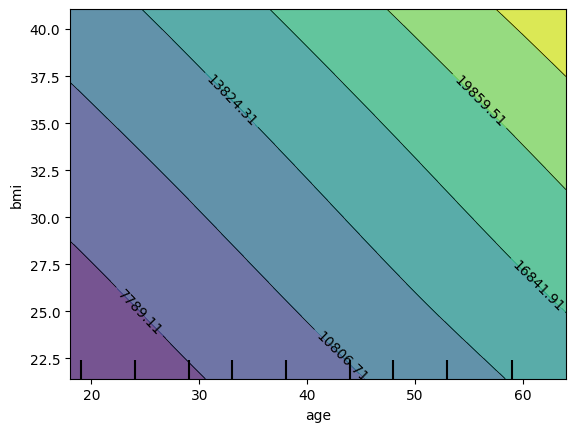

In [7]:
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[("age","bmi")],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])

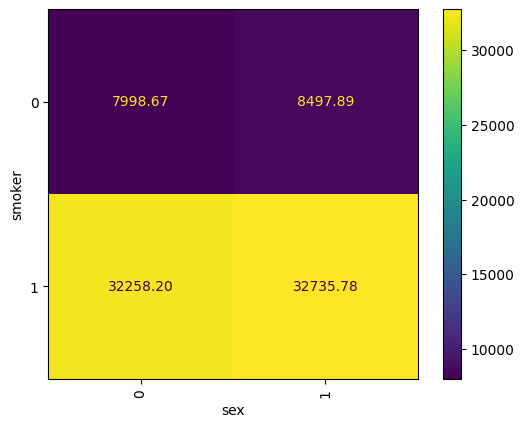

In [8]:
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)
PartialDependenceDisplay.from_estimator(dnn_model, x_train, features=[("smoker","sex")],feature_names=features2.columns, ax=ax,categorical_features=["region","sex","smoker"])

In [21]:
from sklearn.model_selection import KFold


def calculate_cv_scores(models, X, y):
    # Initialize lists to store results
    results = []

    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for model in models:
        model_name = type(model).__name__
        mse_scores = []
        rmse_scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the model and make predictions
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate MSE and RMSE
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            mse_scores.append(mse)
            rmse_scores.append(rmse)

        # Calculate mean MSE and RMSE across folds
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)

        # Append results to the list
        results.append({
            'Model': model_name,
            'Mean_MSE': mean_mse,
            'Mean_RMSE': mean_rmse
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df
models = [dnn_model,xgb_model,random_forest_model,linear_regression_model]
df = calculate_cv_scores(models,features2,targets2)
display(df)

Model    Mean_MSE  Mean_RMSE
0  Pipeline 28687329.54    5346.79
1  Pipeline 27115166.78    5201.35
2  Pipeline 23887873.94    4883.24
3  Pipeline 36998683.92    6077.23

In [23]:
with open("z.tex", "w") as f:
    f.write(df.to_latex())

(20640, 10)
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


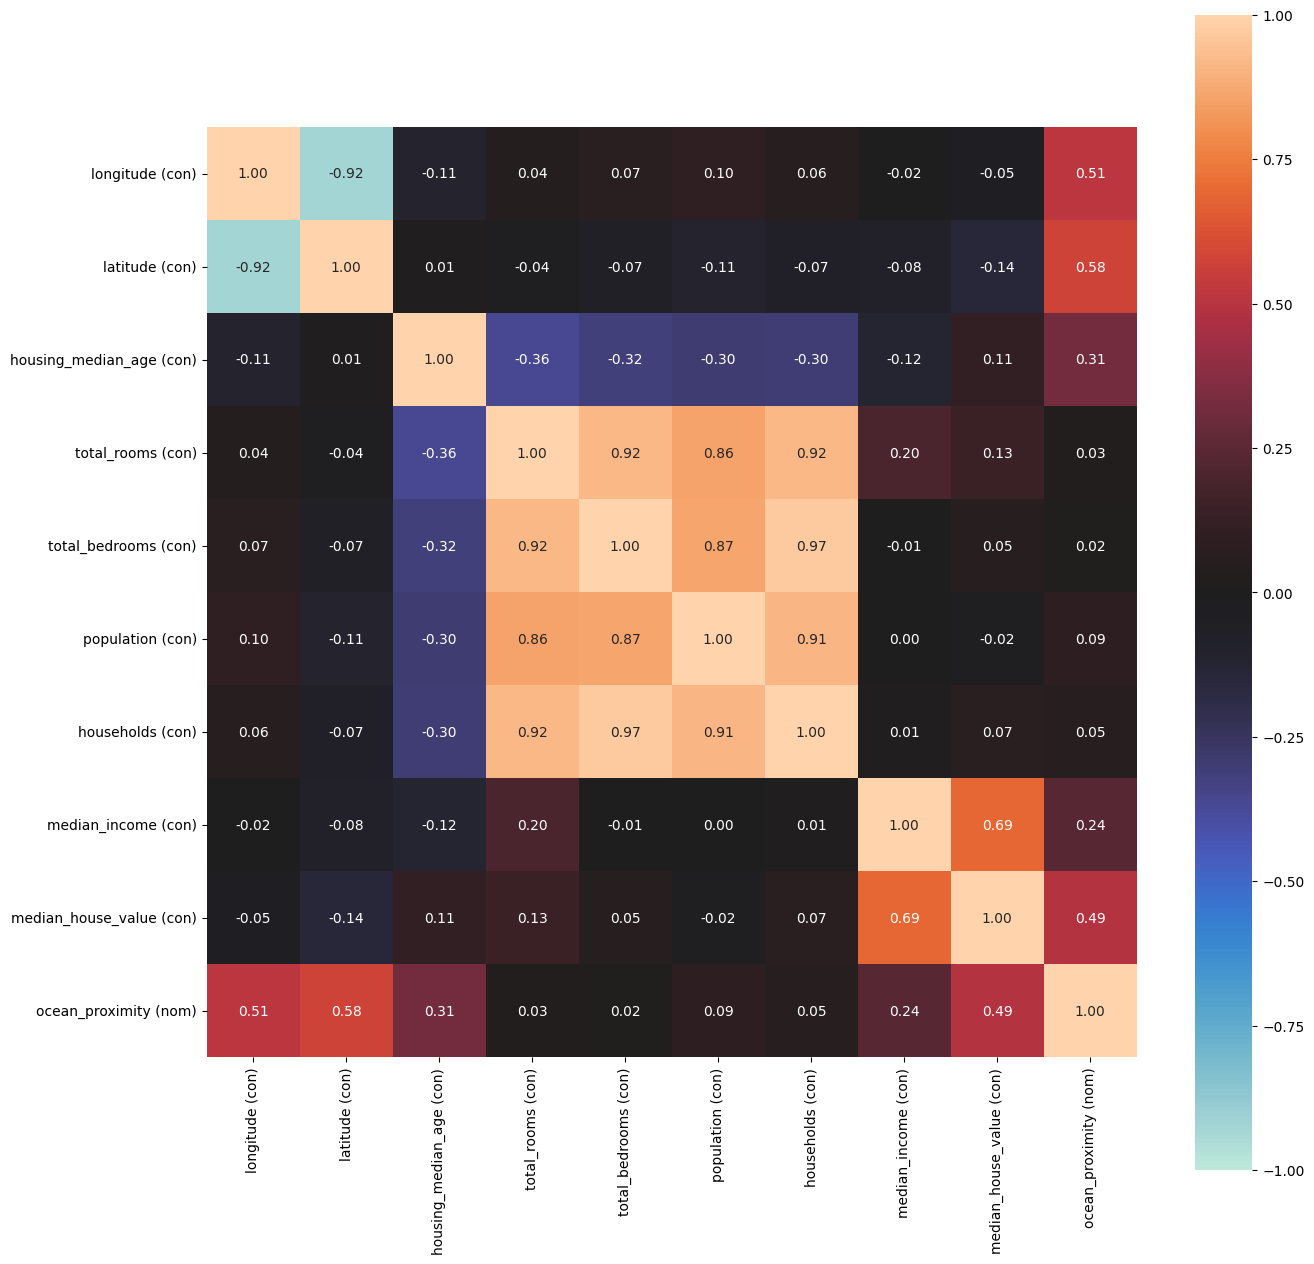

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2449.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:49:20   Log-Likelihood:            -2.0524e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.231e+06   9.82e+04    -22.733      0.000   -2.42e+06   -2.04e+06
longitude                  -2.634e+04   1136.414    -23.181      0.000   -2.86e+04   -2.41e+04
latitude                     -2.5e+04   1118.399    -22.349      0.000   -2.72e+04   -2.28e+04
housing_median_age          1050.3123     49.053     21.412      0.000     954.164    1146.461
total_rooms                   -6.7390      0.880     -7.656      0.000      -8.464      -5.014
total_bedrooms               101.1915      7.574     13.360      0.000      86.346     116.037
population                   -36.1519      1.160    -31.159      0.000     -38.426     -33.878
households                    48.4196      8.149      5.942      0.000      32.448      64.392
median_income               3.931e+04    379.130    103.673      0.000    3.86e+04       4e+04
ocean_proximity_INLAND     -3.988e+04   1943.910    -20.514      0.000   -4.37e+04   -3.61e+04
ocean_proximity_ISLAND      1.275e+05   4.86e+04      2.624      0.009    3.23e+04    2.23e+05
ocean_proximity_NEAR BAY   -4592.3906   2139.299     -2.147      0.032   -8785.650    -399.131
ocean_proximity_NEAR OCEAN  4789.2225   1755.860      2.728      0.006    1347.545    8230.900
==============================================================================
Omnibus:                     4075.651   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15780.332
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                       7.173   Cond. No.                     7.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model Coefficients: [-2.64805993e+04 -2.50991989e+04  1.05607849e+03 -5.97934044e+00
  9.38786818e+01 -3.55218577e+01  4.83897927e+01  3.90599861e+04
 -3.96880911e+04  1.84166868e+05 -2.17909934e+03  4.41230750e+03]


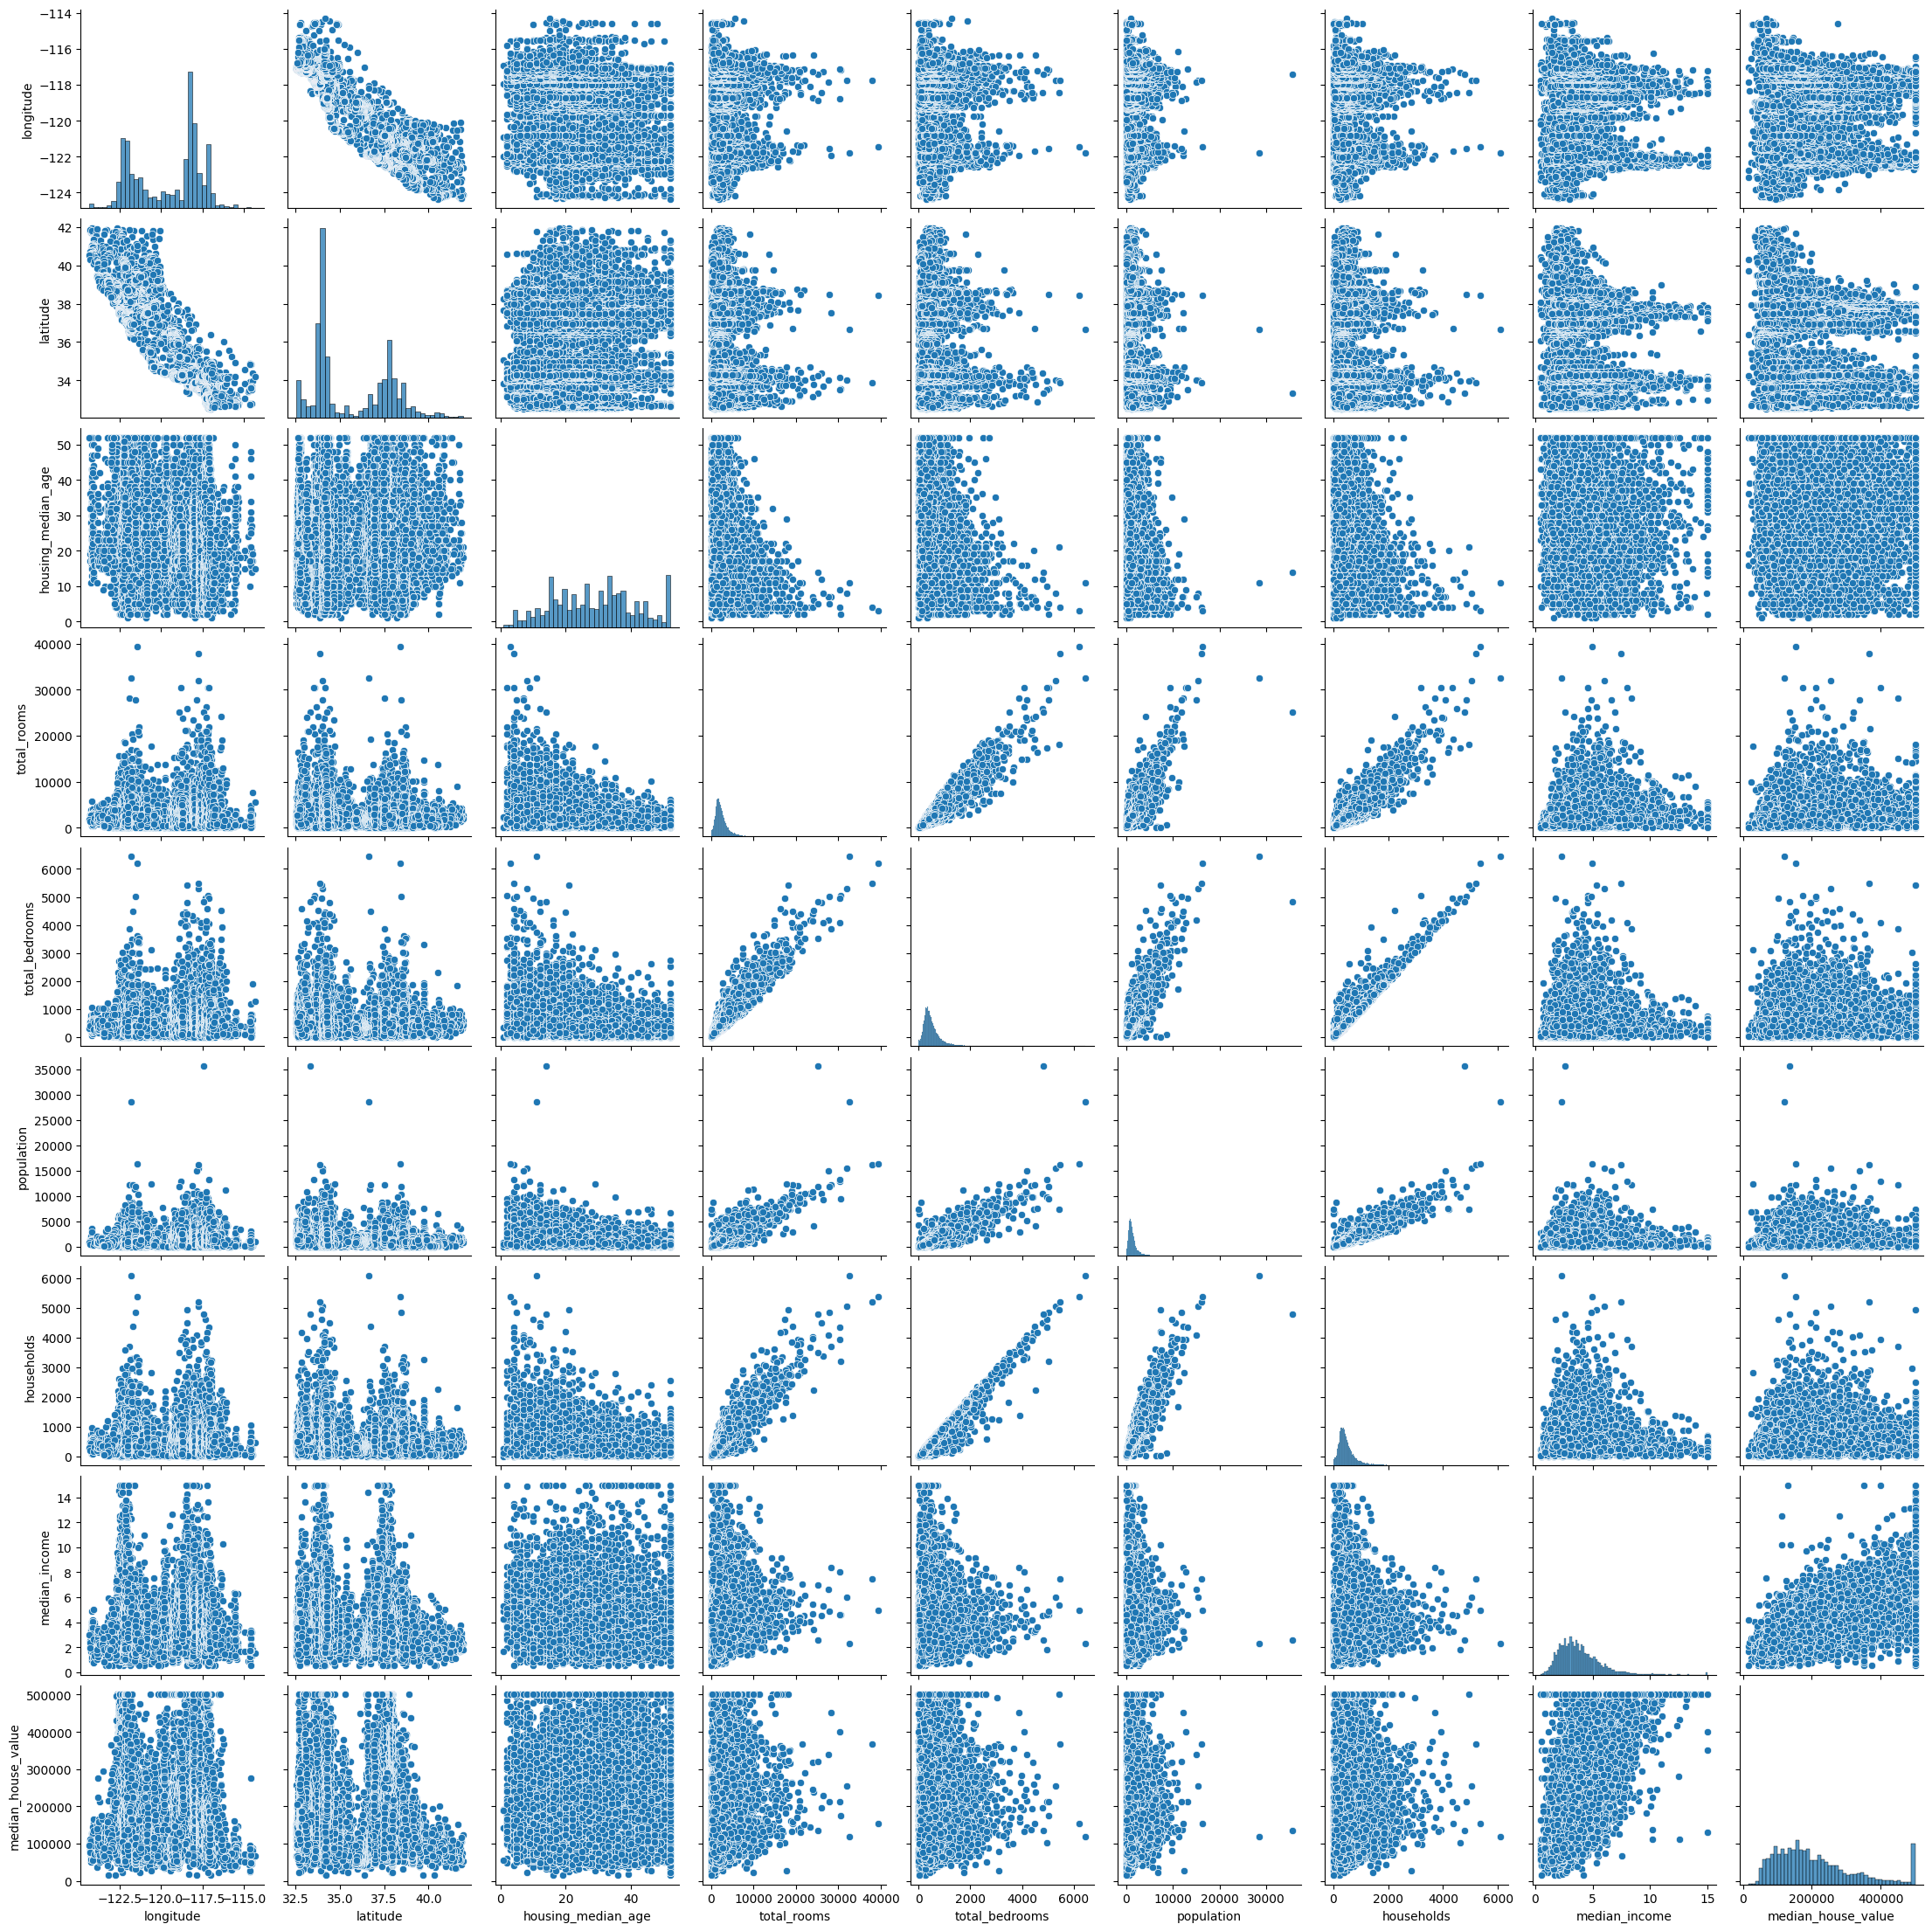

In [6]:

import pandas as pd
import os
data = pd.read_csv(os.path.join(os.getcwd(),
                   "housing.csv"))

print(data.shape)
df = data.copy()
print(df["ocean_proximity"].unique())
correlation_matrix = associations(
    df, mark_columns=True, compute_only=False, figsize=(15, 15),annot=True)
sns.pairplot(df)

df.dropna(inplace=True)

for col in df.columns:
  if df[col].dtype == 'object':
    dummies = pd.get_dummies(df[col], prefix=col,drop_first=True) 
    df = df.join(dummies.astype(int))
df = df.drop('ocean_proximity', axis=1)
x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train = sm.add_constant(x_train)
display(HTML(x_train.head().to_html()))
result = sm.OLS(y_train, x_train).fit()
display(result.summary())
with open("summary_table.tex", "w") as f:
    f.write(result.summary().tables[1].as_latex_tabular())
df = data.copy()
df.dropna(inplace=True)
x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])
categorical_cols = ["ocean_proximity"]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", 'passthrough', ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
linear_regression_model = make_pipeline(
    preprocessor,
    LinearRegression()
)
linear_regression_model.fit(x_train,y_train)
if isinstance(linear_regression_model.named_steps['linearregression'], LinearRegression):
    # Retrieving coefficients if the final estimator is Logistic Regression
    model = linear_regression_model.named_steps['linearregression']
    print("Model Coefficients:", model.coef_)
else:
    print("The final estimator is not Logistic Regression.")

feaure correlation

KeyboardInterrupt: 

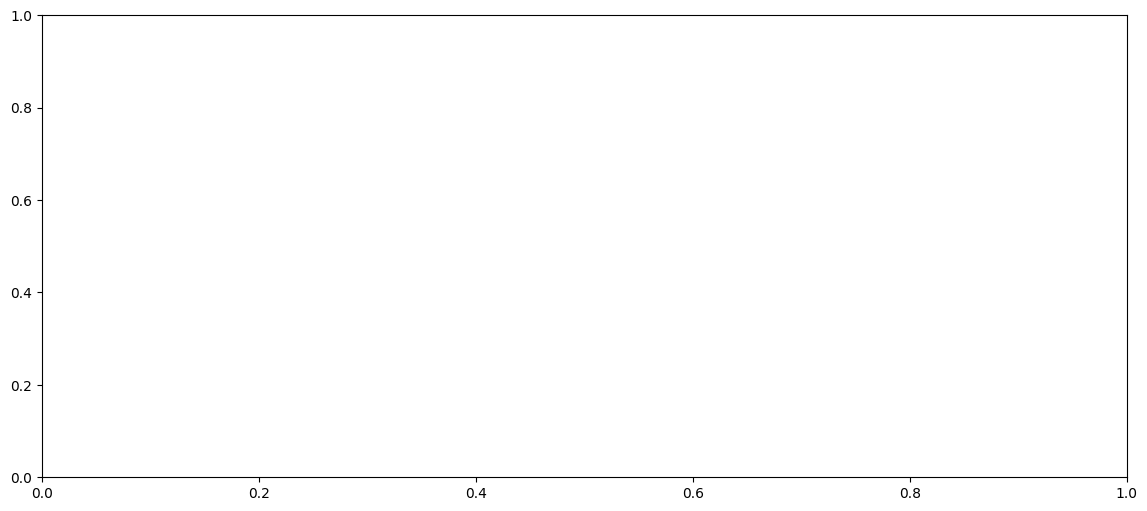

In [7]:
from sklearn.inspection import PartialDependenceDisplay
feature_names = [2,4]
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)  # (rows, columns, index)

disp1 =PartialDependenceDisplay.from_estimator(linear_regression_model, x_train, features=[0,1,2,3,4,5],feature_names=x.columns, ax=ax,kind='both')

random_forest_model = make_pipeline(
    preprocessor,
    RandomForestRegressor()
)
random_forest_model.fit(x_train,y_train)
plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 2, 1)  # (rows, columns, index)
disp1 =PartialDependenceDisplay.from_estimator(random_forest_model, x_train, features=[0,1,2,3,4,5],feature_names=x.columns, ax=ax,kind='both')



In [ ]:
import math


data = pd.read_csv("auto-mpg.csv") 
df = data.drop('car name',axis=1)
df['origin'] = df['origin'].replace({1:'america',2:'europe',3:'asia'})
df = pd.get_dummies(df, columns=['origin'],drop_first=True)
digits_in_hp = pd.DataFrame(df.horsepower.str.isdigit()) # returns true if digits else false
digits_in_hp
df[digits_in_hp['horsepower'] == False]
df = df.replace('?',np.nan)  
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# --- Alternatively with lambda function ---
# medianFIlter = lambda x: x.fillnam(x.median())
# Data = Data.apply(medianFilter,axis=0)
# Converting the Hporsepower column from object/string type to float64
df['horsepower'] = df['horsepower'].astype('float64')
# Dropping the car name attribure from the data

# Replacing the categorical variable with actual values
df.head()

# independent variables
X = df.drop(['mpg'], axis=1)
# dependent variable
y = df['mpg']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
for indx,col_name in enumerate(X_train.columns):
    print("Coefficient of  {} is {}".format(col_name,regression_model.coef_[indx]))
regression_model.score(X_train,y_train) 
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)

rmse = math.sqrt(mse)

print(rmse)
# Adding constant for the OLS model
x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
lr = LinearRegression()
lr.fit(x_train,y_train)
# Displaying model summary
display(model.summary())

Coefficient of  cylinders is -0.39480796616483366
Coefficient of  displacement is 0.028945510765487518
Coefficient of  horsepower is -0.021752207723547395
Coefficient of  weight is -0.007352032065147351
Coefficient of  acceleration is 0.06191936600761837
Coefficient of  model year is 0.8369338917645002
Coefficient of  origin_asia is 2.3952650365937767
Coefficient of  origin_europe is 3.0012830009185154
3.0267110332771368


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1689.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                   1.04e-225
Time:                        20:40:02   Log-Likelihood:                         -741.29
No. Observations:                 278   AIC:                                      1499.
Df Residuals:                     270   BIC:                                      1528.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cylinders        -0.6654      0.427     -1.558      0.120      -1.506       0.175
displacement      0.0284      0.010      2.747      0.006       0.008       0.049
horsepower       -0.0443      0.016     -2.845      0.005      -0.075      -0.014
weight           -0.0067      0.001     -7.945      0.000      -0.008      -0.005
acceleration     -0.1202      0.110     -1.090      0.277      -0.337       0.097
model year        0.6229      0.029     21.627      0.000       0.566       0.680
origin_asia       2.1483      0.697      3.083      0.002       0.777       3.520
origin_europe     2.3585      0.699      3.372      0.001       0.982       3.735
==============================================================================
Omnibus:                       27.282   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.908
Skew:                           0.609   Prob(JB):                     4.82e-10
Kurtosis:                       4.490   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

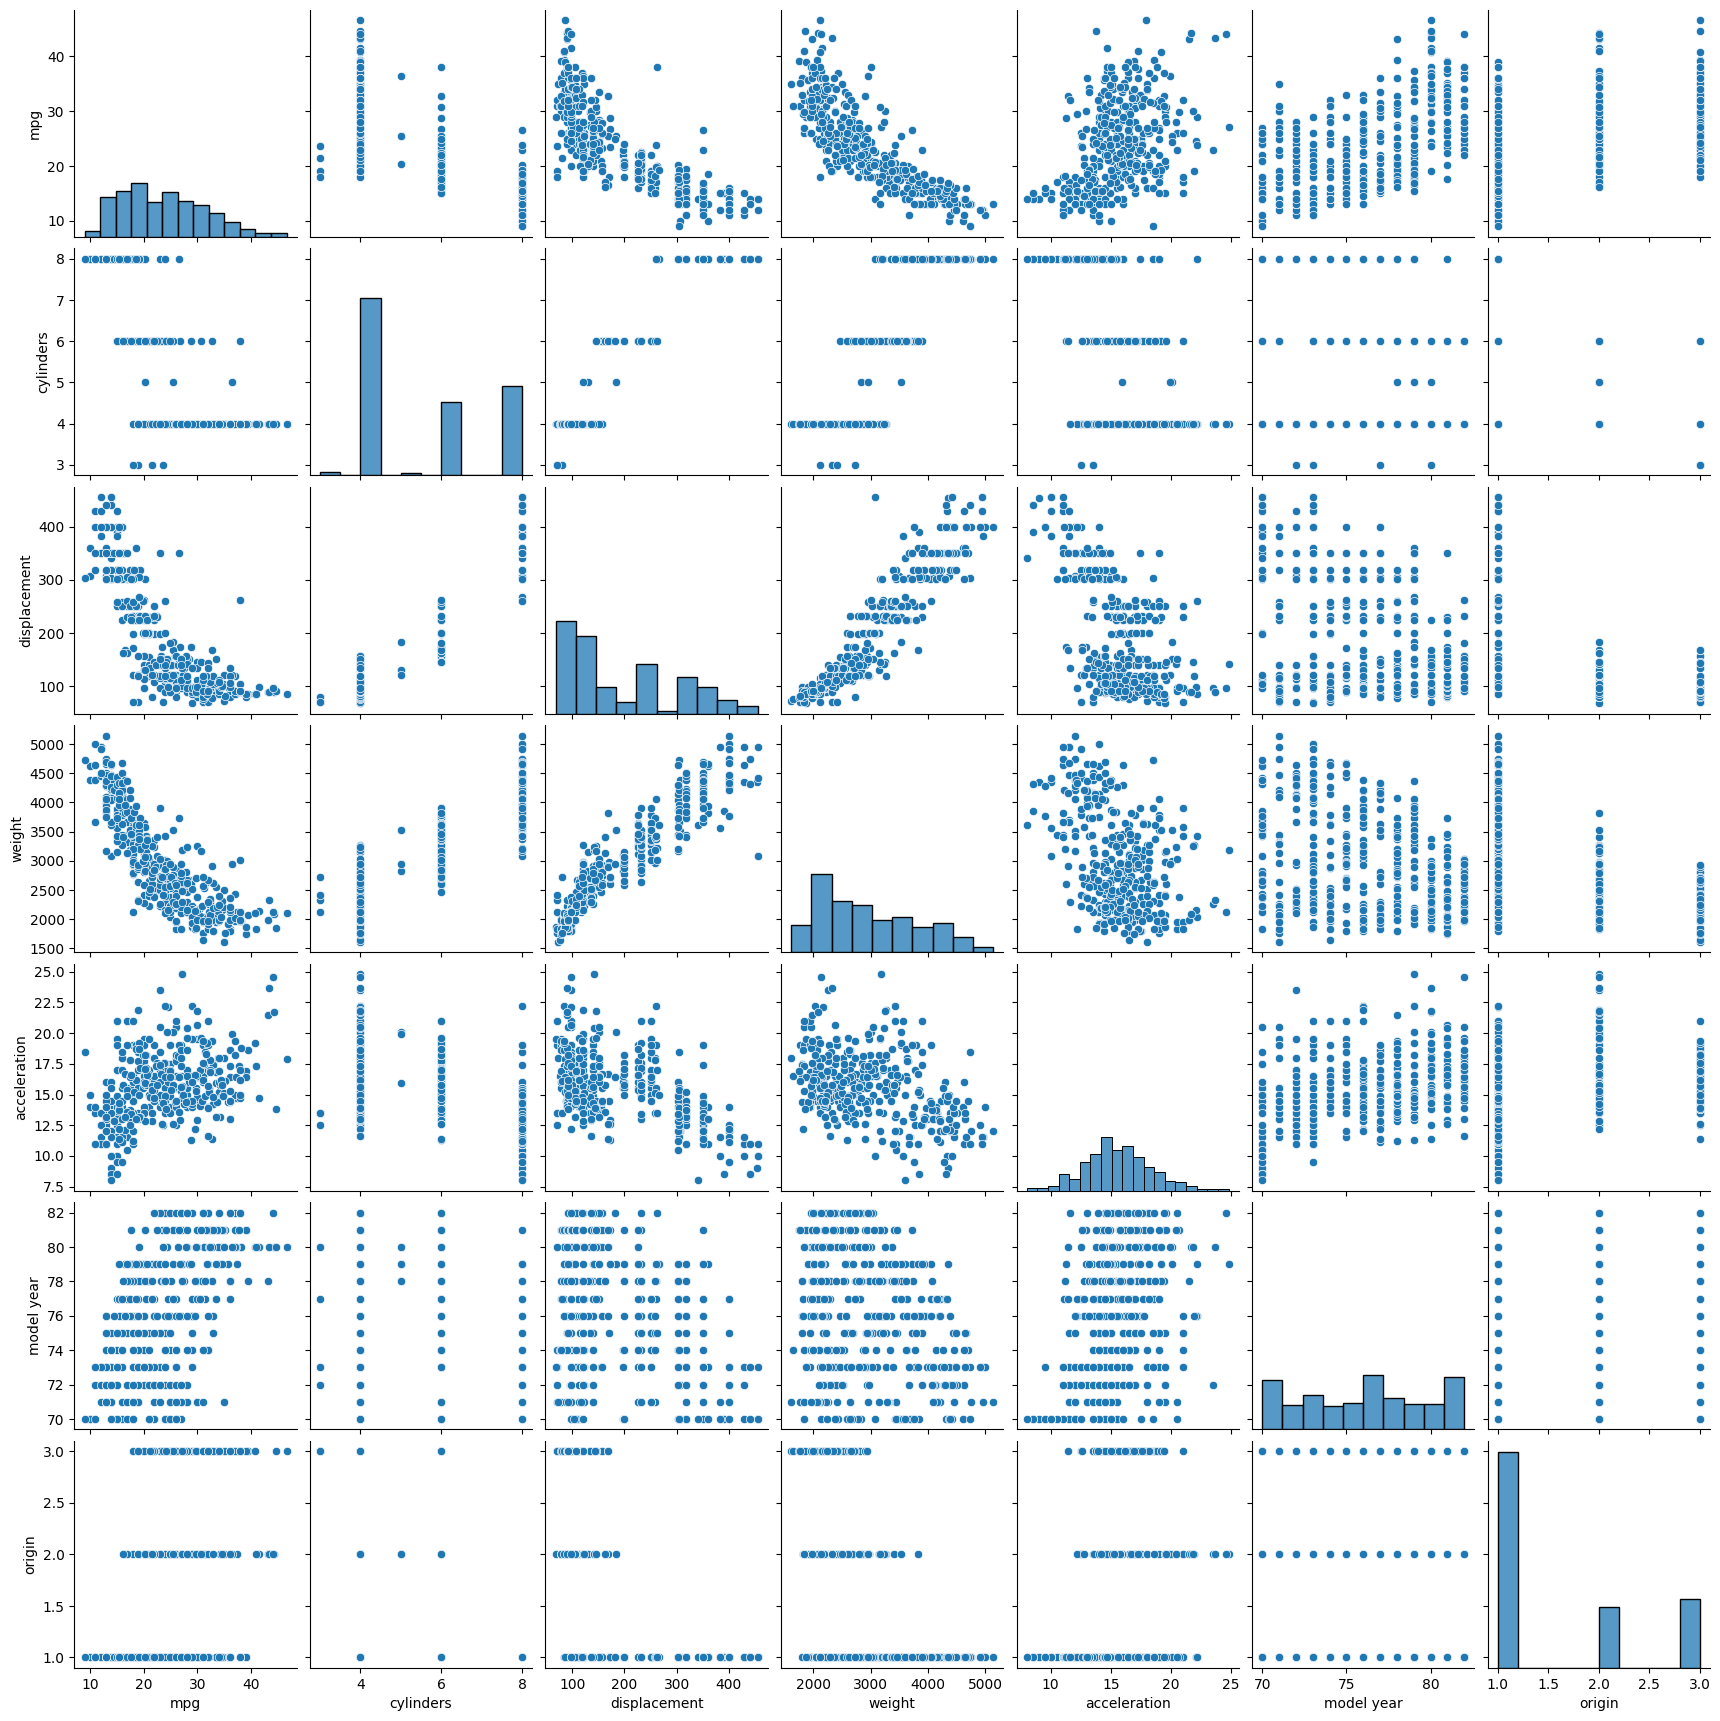

In [ ]:
sns.pairplot(data)

In [ ]:
import pandas as pd
import os

from sklearn.discriminant_analysis import StandardScaler

data = pd.read_csv(os.path.join(os.getcwd(),
                   "housing.csv"))
df = data.copy()
df.dropna(inplace=True)
for col in df.columns:
  if df[col].dtype == 'object':
    dummies = pd.get_dummies(df[col], prefix=col) 
    df = df.join(dummies.astype(int))
df = df.drop('ocean_proximity', axis=1)
x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.3,random_state =123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LazyRegressor(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     regressors=[RandomForestRegressor,xgb.XGBRegressor,LinearRegression])
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

NameError: name 'train_test_split' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.2,random_state =123)
model = SVR(kernel='linear',gamma='auto',C=1)
model.fit(X_train,y_train)
model.predict(X_test)
# Assuming 'predictions' contains the predicted values
predictions = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)

Mean Squared Error: 8132805613.924304
R-squared: 0.36570678118830735
Mean Absolute Error: 66905.26388954466
